<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

<center>Author: [Yury Kashnitskiy](http://yorko.github.io) <br>
Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) <br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #1 (demo)
## <center>  Exploratory data analysis with Pandas


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already here). Choose the answers in the [web-form](https://docs.google.com/forms/d/1uY7MpI2trKx6FLWZte0uVh3ULV4Cm_tDud0VDFGCOKg). This is a demo version of an assignment, so by submitting the form, you'll see a link to the solution .ipynb file.**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../input/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Firstly, find the column without NaN values for using it while analysis

In [3]:
data['age'].isna().any()

False

**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [4]:
data.groupby('sex').agg({'age':'count'}).rename({'age':'count'})

,age
sex,
Female,10771
Male,21790


**2. What is the average age (*age* feature) of women?**

In [5]:
data.groupby('sex').agg({'age':'mean'}).rename({'age':'mean'})

,age
sex,
Female,36.858230
Male,39.433547


**3. What is the percentage of German citizens (*native-country* feature)?**

In [6]:
data['native-country'].value_counts(normalize=True).loc['Germany'] * 100

0.42074874850281013

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?**

In [7]:
import numpy as np

In [8]:
data.groupby('salary')['age'].agg([np.std, np.mean])

,std,mean
salary,,
<=50K,14.020088,36.783738
>50K,10.519028,44.249841


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

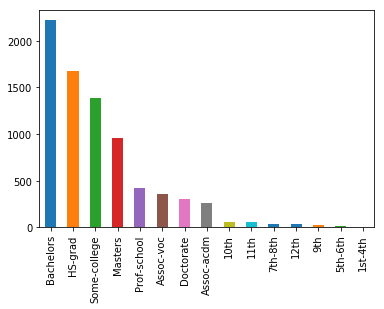

In [9]:
data[data['salary']=='>50K']['education'].value_counts().plot.bar()

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [10]:
data.groupby(['race', 'sex'])['age'].describe()

count       mean  ...     75%   max
race               sex                         ...              
Amer-Indian-Eskimo Female    119.0  37.117647  ...   46.00  80.0
                   Male      192.0  37.208333  ...   45.00  82.0
Asian-Pac-Islander Female    346.0  35.089595  ...   43.75  75.0
                   Male      693.0  39.073593  ...   46.00  90.0
Black              Female   1555.0  37.854019  ...   46.00  90.0
                   Male     1569.0  37.682600  ...   46.00  90.0
Other              Female    109.0  31.678899  ...   39.00  74.0
                   Male      162.0  34.654321  ...   42.00  77.0
White              Female   8642.0  36.811618  ...   46.00  90.0
                   Male    19174.0  39.652498  ...   49.00  90.0

[10 rows x 8 columns]

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

Firstly, let's see how `marital-status` depend on gender

In [11]:
data.groupby('sex')['marital-status'].value_counts()

sex     marital-status       
Female  Never-married             4767
        Divorced                  2672
        Married-civ-spouse        1657
        Widowed                    825
        Separated                  631
        Married-spouse-absent      205
        Married-AF-spouse           14
Male    Married-civ-spouse       13319
        Never-married             5916
        Divorced                  1771
        Separated                  394
        Married-spouse-absent      213
        Widowed                    168
        Married-AF-spouse            9
Name: marital-status, dtype: int64

We see that it is **the same values** for female and male, so we need to select the subset of our data

In [12]:
men_data = data[data.sex=='Male']

Now we can do some *feature engineering*. Let's create a new column that will show whether **the man is married or not**

In [13]:
men_data['married or not'] = men_data['marital-status'].str.contains('Married').values
men_data.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,married or not
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,True


Now we can see the distribution of salary for married and bachelors

In [14]:
pd.crosstab(men_data['married or not'], men_data['salary'])

salary,<=50K,>50K
married or not,,
False,7552,697
True,7576,5965


We also can do the same analysis for all entries in our data (Male and Female)

In [15]:
data['married or not'] = data['marital-status'].str.contains('Married').values
pd.crosstab(data['married or not'], data['salary'])

salary,<=50K,>50K
married or not,,
False,16039,1105
True,8681,6736


**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [16]:
# the maximum number of hours a person works per week
data['hours-per-week'].max()

99

In [17]:
# How many people work such a number of hours
len(data[data['hours-per-week']==data['hours-per-week'].max()])

85

In [18]:
# What is the percentage of those who earn a lot () among them
workhard_data = data[data['hours-per-week']==data['hours-per-week'].max()]
workhard_data['salary'].value_counts(normalize=True)*100

<=50K    70.588235
>50K     29.411765
Name: salary, dtype: float64

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [19]:
data.pivot_table(index='native-country',
                 values='hours-per-week',
                 columns='salary',
                 aggfunc='mean')

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
